# 1. Linear Regression

### 가상의 데이터로 예측하기

In [9]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다. make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [10]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [11]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

input data :
[[-0.16845392]
 [-0.24834764]
 [-1.16915878]
 [ 0.02753652]
 [ 0.19214725]
 [-0.17157859]
 [ 0.88468012]
 [ 0.88235369]
 [ 2.37434403]
 [-0.49727046]], 

 output data :
[ 985.80388193 1005.88159474  903.15174297 1076.60730239  874.99582882
  922.28301444 1039.8264326  1091.37888833 1278.69151092  997.59795566]


- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수  
- n_features : 기본값은 100, 독립변수의 수(차원), 정수  
- n_target : 기본값은 1, 종속변수의 수, 정수  
- bias = 기본값은 0.0, y절편, 실수   
- nosie = 기본값은 0.0, 분포 

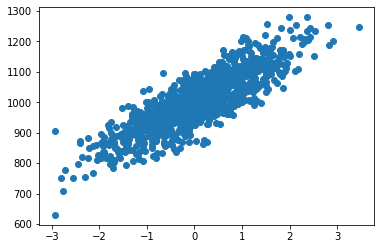

In [12]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.show()

#### 선형 모델을 만들어 보자.

In [13]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True)
# X_train, y_train, X_test, y_test 
# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용해도 된다.)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [14]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# model에는 W1 * X1 + W0 (선형회귀의 기본 Hypothesis)가 생략되어 있습니다.

#### 생성한 모델을 학습시켜보자.

In [15]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# cost = avg((model - y)**2) 생략된 코드입니다. (예측값에서 결과값을 뺀 평균 즉, cost를 구하는 것)
# for i in range(10000):
#     gradDecent(cost)  구한 cost값을 이용해서 gradient Descent 실행
# 생략된 과정들이 fit()안에 들어 있습니다.

#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [16]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([81.33637518])

In [17]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

999.3773396125379

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [18]:
print("train data score : {:.2f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.2f}".format(model_linear.score(X_test, y_test)))

train data score : 0.73
test data score : 0.72


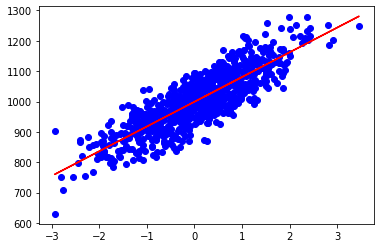

In [22]:
#Trainset data 와 함께, Hypothesis (직선) 시각화해보기
#Testset data 와 함께, Hypothesis (직선) 시각화해보기
from matplotlib import pyplot as plt

plt.scatter(X_train, y_train, c='b')
plt.plot(X_train, model_linear.predict(X_train), c='r')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predcit() 명령어를 사용하여 y값을 예측합니다.

In [24]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [25]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [26]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 2180.076, RMSE : 46.691


In [27]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.72


- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.  
- 모델의 성능만을 측정할때는 위의 번거러운 과정없이 score함수만을 활용하면 됩니다.

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

In [ ]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

input data : 
[[-0.89893875 -0.38232927 -0.02764584  1.28215576 -0.12221845  0.05075093
  -1.35403399  1.71598437 -0.34806361 -0.49676114  2.01335119  0.46868522
  -2.19388556 -1.08664966 -1.31217141 -0.50683323  0.7228464   0.35779812
  -0.32073133 -1.06153573  0.38825696  2.69837473 -0.00376013  0.76331488
  -1.17469749 -0.45915049 -0.29340555 -0.10353838 -1.09842877 -0.15063709
  -0.02731992 -2.10120859  0.20575473 -0.23575692  0.41921806  1.91198382
   0.64499231  0.27857774  0.10447785  0.10623335 -1.00894554  0.15692612
   0.57298584 -1.14259856 -0.66015655  0.30939303 -0.17190089  0.7466072
   0.6802594  -1.11105845  0.38767931  0.81054941  0.01846141  0.38723233
   0.3052744  -0.47698657  0.05763386  0.93421152 -1.67205587 -0.24995249
  -0.23794883  1.36886204 -0.41141613  0.86412202 -1.00308032  1.5578547
   0.68191528  0.40286484  0.46693997  0.95440839 -0.3162511   0.78458904
   1.34630633  1.00421042  0.36550906 -0.85566584  0.22170449  1.67830147
   0.97441251 -0.22540055 

여기서는 input data를 살펴보도록 하자.  
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [ ]:
hypothesis_multi = LinearRegression()
# hypothesis = W0 + W1 * X1 + W2 * X2 + ... + W10 * X10
# weight의 값은 10개 bias는 11개로 구성되어 있다.

In [ ]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [ ]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[ 8.73811591e+01  5.47217387e+00  2.20276246e+00  7.30863383e-01
 -6.58856558e-01  9.28631611e+01  9.09843467e+01  1.32007585e-01
 -4.65746450e+00 -2.31928728e+00  5.01225593e+00 -3.70528553e-01
 -2.87552501e+00 -2.22574658e+00 -8.80761414e-01  1.99233210e+00
  3.72591836e+00  1.13767215e+00  9.34043214e+01  1.51260851e-01
 -8.44246870e-01  1.14057930e+00 -1.11018463e-01 -2.04304138e+00
 -6.15936872e-01 -3.95092599e+00  3.32790714e+00  2.26901022e+00
  2.58981912e+00 -1.56415546e+00 -8.97029845e-01  8.09217785e-01
 -3.00661980e+00  3.23886659e+00  3.80136248e+01 -2.23204999e-01
  2.03948751e-01 -1.80215142e+00 -5.36301651e-02  1.80020838e+00
 -7.41250842e-01 -3.26315425e+00 -2.02629293e+00 -2.87083028e+00
  1.99920176e+00 -2.26660054e+00  4.58045160e+00 -1.07374413e+00
  1.53762271e+00 -6.76056767e-01  9.68292850e-01 -5.09750699e+00
  2.38073207e+00 -2.58895094e+00  3.93044293e+00  5.63219650e+01
  1.24308703e+00 -5.62852344e+00  2.17033954e+00 -1.07237114e+00
 -1.97747030e+0

In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.95
검증 데이터 점수 : 0.93


noise = 100

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_2,y_2 = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 200)

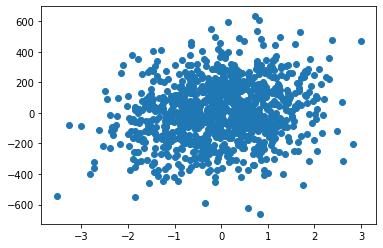

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_2, y_2)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, 
                                                    shuffle = True)
hypothesis_noise100 = LinearRegression()
model_linear_noise100 = hypothesis_noise100.fit(X_train, y_train)

In [ ]:
print('weight : \n{}\n\n'.format(model_linear_noise100.coef_))
print('bias : \n{}'.format(model_linear_noise100.intercept_))

weight : 
[47.70214173]


bias : 
6.005510498700329


In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_test, y_test)))

학습 데이터 점수 : 0.06
검증 데이터 점수 : -0.04


make_regression을 이용해 가상 데이터를 생성할 때 noise의 값에 따른 결과를 보여주고 있다.

### 보스턴 주택데이터 예측하기

In [28]:
from sklearn.datasets import load_boston

In [29]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [30]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [33]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
import numpy as np

arr = np.array([[[1, 2], [3, 4]]])
print(arr)
print(arr.shape)
print(arr.ndim)
print(arr.dtype)

[[[1 2]
  [3 4]]]
(1, 2, 2)
3
int64


In [44]:
lst = [1, '가'] # 리스트 다국적사회
arr = np.array(lst)# 넘파이 array는 단일민족
arr

array(['1', '가'], dtype='<U21')

In [34]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [45]:
boston['data'].shape

(506, 13)

In [35]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [ ]:
train_test_split?

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'],
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
LinearRegression?

In [47]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.01484559e-01  4.10329605e-02  3.09927003e-03  2.12167953e+00
 -1.70821437e+01  3.70084148e+00  1.38282925e-02 -1.37184048e+00
  2.87764861e-01 -1.04026550e-02 -9.86890901e-01  9.56025239e-03
 -5.92280828e-01]

bias: 36.40634837785371


In [48]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.7427348288211011, 0.7229904919548039)

In [49]:
model_boston.predict(X_test)

array([19.14671749, 27.28896029,  3.66874909, 29.94537876, 13.07364116,
       19.15530203, 35.58930559, 24.27768899, 29.15299363, 24.01656867,
       22.83108897, 16.57220087, 32.9288227 , 23.44729393, 31.65454291,
       26.73772759,  9.04692384, 30.88345202,  8.14347375, 17.59651801,
       40.61529072, 21.14555238, 12.25757205, 39.02312321, 15.90496404,
       16.60612321, 24.42698418, 35.26240553, 42.69702657, 25.87544128,
       32.73425924, 21.22224174, 15.59895938, 13.79598737, 25.07183152,
        2.72947038, 12.69317614, 22.05488243, 19.37670277, 25.50355466,
       21.20004483, 37.54553469, 20.75257444, 20.47028843, 12.78492912,
       13.2650617 , 19.29662116, 11.05427718, 29.74143872, 39.92670563,
        5.09646704, 17.31971256, 15.59494236, 17.1872768 , 36.16099488,
       19.82028342, 25.49979793, 27.45789783, 26.34183992, 14.64253604,
       21.10477685, 29.2514288 , 24.49648919, 22.16249689, 31.05562839,
       18.07400724, 30.53913001, 17.13657375, 16.24441127, 20.35